Задание № 0
Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

желаемая точность  Δ  = 3;
дисперсия  𝜎2  = 225;
уровень доверия  𝛽  = 0.95.

In [2]:
#Загружаем библиотеки
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [5]:
delta = 3
sigma = 225**0.5
beta = 0.95

# Оругляем полученное значение в большую сторону
N = math.ceil((sigma * scipy.stats.norm.ppf(beta) / delta)**2)

print('Необходимое минимальное число человек для опроса:', N)

Необходимое минимальное число человек для опроса: 68


Задание № 1
Постройте 98% доверительный интервал для среднего значения, если известно, что

объем выборки n = 25;
среднее значение по выборке  𝑥⎯⎯⎯  = 130;
Из достоверных источников известно стандартное отклонение  𝜎=12 .

In [6]:
n = 25
x_mean = 130
sigma = 12
beta = 0.98
delta = (sigma * scipy.stats.norm.ppf(beta))/(n**0.5)
print('Точность интеравальной оценки', delta)

Точность интеравальной оценки 4.928997385516373


In [7]:
print('Доверительный интервал (', x_mean-delta, ';', x_mean+delta, ')')

Доверительный интервал ( 125.07100261448363 ; 134.92899738551637 )


Задание № 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, 
что различия между выборками незначительно, если уровень значимости равен 0.001¶

In [4]:
import scipy.stats as stats

population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

# Н0 - различие между выборками незначительно

# Н1 - различие между выборками значительно

In [5]:
stats.ttest_ind(population_men,population_women)

alpha = 0.001
result = stats.ttest_ind(population_men, population_women, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, различие между выборками значительно')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=1.4687554639725673, pvalue=0.1419252815725252)
Не отвергаем нулевую гипотезу


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F9E99C400>]],
      dtype=object)

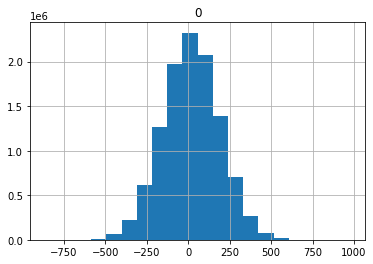

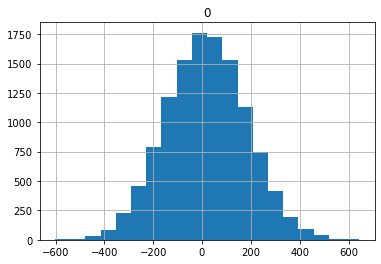

In [6]:
pd.DataFrame(population_men).hist(bins=20)
pd.DataFrame(population_women).hist(bins=20)

Задание № 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей.¶

In [7]:
sigma = 150
Z = 1.96  # 95%
e = 50 #%

N = int(((sigma*Z)/e)**2)
N

34

Задание № 4. Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за 0.05 ( 𝛼=0.05 ).

In [9]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations


,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [ ]:
# H0 - волшебник настоящий, различий между выборками нет

# H1 - "волшебник" обманывает

In [10]:
oddsratio, pvalue = stats.fisher_exact(observations)  # Возможно вам пригодится эта функция.

### Ваш код...
print(f'p-value = {pvalue}, alpha = 0.05')
print(oddsratio)

p-value = 0.35417955365927367, alpha = 0.05
0.5811965811965812


In [ ]:
# Если принять уровень значимости за 0.05, то видим, что pvalue > 0.05, и мы не можем отвергнуть гипотезу о том, 
# что "волшебник" умеет предсказывать погоду.

Задание № 5
Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия  𝛽=90%  для выборки:

In [26]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [27]:
def mean_confidence_interval(data, confidence):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return  m-h, m, m+h

mean_confidence_interval(data, confidence=0.95)

(5.961614036054297, 6.628571428571429, 7.295528821088561)

Задание № 6
Принадлежат ли выборки data_1 и data_2 одному множеству?

Оцените это с помощью известных вам тестов для проверок статистических гипотез;
Покажите различия визуально.

In [28]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

In [30]:
stat, p = scipy.stats.ttest_ind(data_1, data_2)
print(stat, p)

7.35744682757447 2.1159475572725764e-11


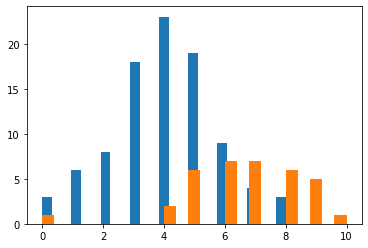

In [33]:
plt.hist(data_2, bins=25);
plt.hist(data_1, bins=25);

In [34]:
# Нулевая гипотеза - выборки из одного множества, p-value=2.11*10^-11, 
#поэтому ее мы отклоняем. Выборки не принадлежат одному множеству

Задание № 7 (задание без подвоха)
На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

Предположим, Вы сформировали две гипотезы:
нулевая гипотеза - распределение нормальное;
альтернативная гипотеза - распределение ненормальное.
допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости p-value = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)

In [35]:
#Обычно для таких проверок нулевая гипотеза - это схожесть распредения с нормальным при уровне значимости 0,05. 
# По условию p-value - 0,03 -> При этом нельзя точно сказать, что наше распределение является нормальным или не нормальным.
#Мы предполагаем, что наше распределение не нормальное, но есть вероятность в 5%, что мы допустили ошибку
#и отклонили верную гипотезу

Задание № 8
Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом B.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

Требуется выяснить, имеется ли значимое различие эффективности препаратов А и B, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики? (уровень значимости принять за 0.05 (5%))

При каком минимальном p-value различия были бы уже значимы?

Если выборки незначительно отличаются, то продемонстрируйте это визуально

In [36]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-7.5,size=300)

In [37]:
alpha = 0.05

stat, p = scipy.stats.ttest_ind(A, B, equal_var=False)
if p < alpha:
    print(f'Эффективность препаратов отличается на уровне значимости {alpha :.1%}')
else:
    print(f'Эффективность препаратов одинакова на уровне значимости {alpha :.1%}')

Эффективность препаратов одинакова на уровне значимости 5.0%


In [38]:
# pvalue=0.74 -> различий в эффективности не наблюдается. Разиличя будут значимы, если p-value будет меньше
#принятого нами уровня значимости. А уровень значимости мы можем как повышать, так и понимажть 
#в зависимости от задачи. 

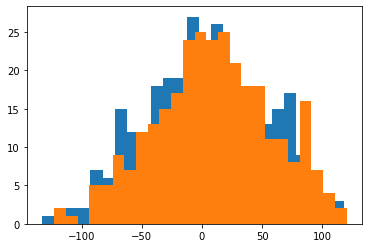

In [39]:
plt.hist(B, bins=25);
plt.hist(A, bins=25);